In [1]:
from uniswappy import *
import matplotlib.pyplot as plt

user_nm = 'user0'
eth_amount = 10000
tkn_amount = 100000

fee = UniV3Utils.FeeAmount.MEDIUM
tick_spacing = UniV3Utils.TICK_SPACINGS[fee]
lwr_tick = UniV3Utils.getMinTick(tick_spacing)
upr_tick = UniV3Utils.getMaxTick(tick_spacing)

In [2]:
n_steps = 50
start_price = eth_amount/tkn_amount
mu = 0.3; sigma = 0.8
n_paths = 1

b = BrownianModel(start_price)
p_arr = b.gen_gbms(mu, sigma, n_steps, n_paths)
exp_p_arr = np.median(p_arr, axis = 1)

Text(0.5, 0, 'Date')

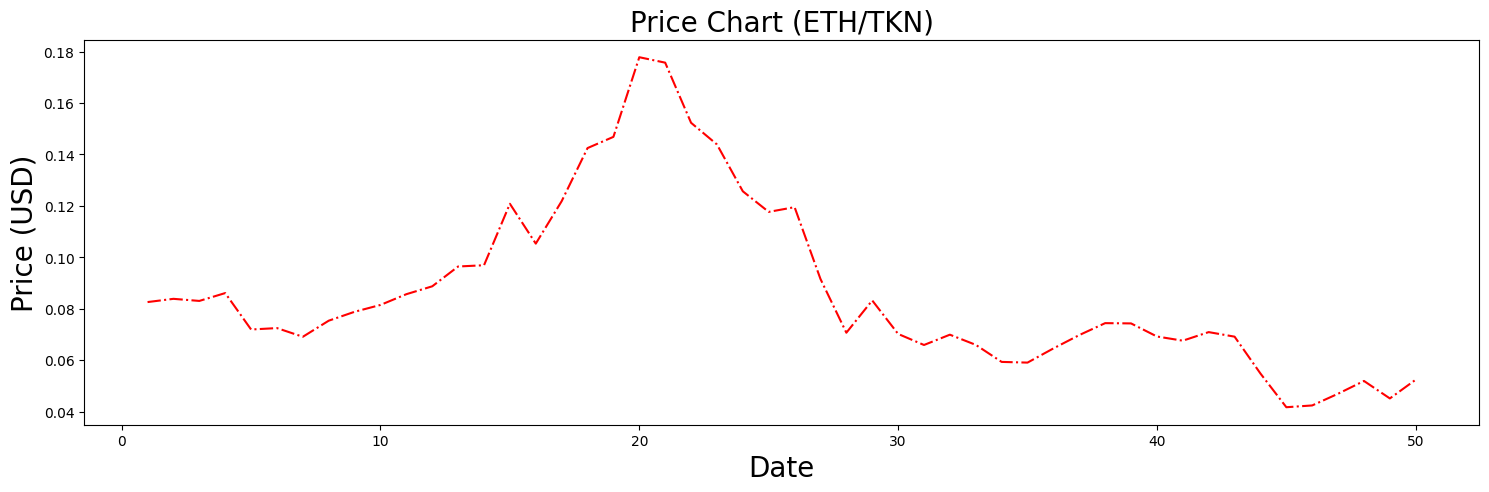

In [3]:
x_val = np.arange(0,len(p_arr))
fig, (USD_ax) = plt.subplots(nrows=1, sharex=False, sharey=False, figsize=(18, 5))
USD_ax.plot(x_val[1:], p_arr[1:], color = 'r',linestyle = 'dashdot', label='initial invest') 
USD_ax.set_title(f'Price Chart (ETH/TKN)', fontsize=20)
USD_ax.set_ylabel('Price (USD)', size=20)
USD_ax.set_xlabel('Date', size=20)

In [4]:
tkn = ERC20("TKN", "0x111")
eth = ERC20("ETH", "0x09")
exchg_data = UniswapExchangeData(tkn0 = eth, tkn1 = tkn, symbol="LP", address="0x011")

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)

Join().apply(lp, user_nm, eth_amount, tkn_amount)
lp.summary()

Exchange ETH-TKN (LP)
Reserves: ETH = 10000, TKN = 100000
Liquidity: 31622.776601683792 



In [5]:
arb = CorrectReserves(lp, x0 = 1/exp_p_arr[0])
for k in range(1, n_steps):
    p = 1/exp_p_arr[k]
    arb.apply(p)
    
    
    select_tkn = EventSelectionModel().bi_select(0.5)
    bias_factor = 1
    rnd_amt = TokenDeltaModel(30).delta()

    if(select_tkn == 0):
        out = Swap().apply(lp, eth, user_nm, rnd_amt) 
    else:
        out = Swap().apply(lp, tkn, user_nm,  bias_factor*p*rnd_amt)  
   
    print(f'price {lp.get_price(tkn)} {exp_p_arr[k]}')

print('')
lp.summary()

price 0.08249747694245653 0.08264079076949099
price 0.08390128167819108 0.08389873525626523
price 0.08341726721724808 0.08308531229779437
price 0.08629585459691674 0.08613555270029427
price 0.07217886383051719 0.07197994715928742
price 0.0722649212748849 0.07252902355378886
price 0.06918442339489239 0.06915159031247911
price 0.07530009200686393 0.07540525091384292
price 0.07886637619795865 0.07886901181319858
price 0.08154493518889286 0.0815290898488081
price 0.08574323503562037 0.0857039746896528
price 0.08869130871808972 0.0887673675256717
price 0.09640933453258597 0.0964677922509411
price 0.0972354570085397 0.09695348767200376
price 0.12072750484872205 0.12084035627458466
price 0.1053303796457837 0.10535555084164994
price 0.12188171667483351 0.1218505816080023
price 0.14228282687574806 0.14249241217477587
price 0.14706085086349807 0.1468511839781091
price 0.17761848502988195 0.177802313044964
price 0.17567927117962934 0.17568834147046106
price 0.15237507378973977 0.15231824076087913

In [6]:
eth = ERC20("ETH", "0x09")
tkn = ERC20("TKN", "0x111")

exchg_data = UniswapExchangeData(tkn0 = eth, tkn1 = tkn, symbol="LP", 
                                   address="0x011", version = 'V3', 
                                   tick_spacing = tick_spacing, 
                                   fee = fee)

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)

Join().apply(lp, user_nm, eth_amount, tkn_amount, lwr_tick, upr_tick)
lp.summary()

Exchange ETH-TKN (LP)
Real Reserves:   ETH = 9999.999999999998, TKN = 100000.0
Liquidity: 31622.776601683792 



In [7]:
arb = CorrectReserves(lp, x0 = 1/exp_p_arr[0])
for k in range(1, n_steps):
    p = 1/exp_p_arr[k]
    arb.apply(p, lwr_tick, upr_tick)
    
    
    select_tkn = EventSelectionModel().bi_select(0.5)
    bias_factor = 1
    rnd_amt = TokenDeltaModel(30).delta()

    if(select_tkn == 0):
        out = Swap().apply(lp, eth, user_nm, rnd_amt) 
    else:
        out = Swap().apply(lp, tkn, user_nm,  bias_factor*p*rnd_amt)  
   
    print(f'price {lp.get_price(tkn)} {exp_p_arr[k]}')

print('')
lp.summary()

price 0.08218012399168217 0.08264079076949099
price 0.08397110061035197 0.08389873525626523
price 0.08316496205078507 0.08308531229779437
price 0.08614407253264235 0.08613555270029427
price 0.07199938183024464 0.07197994715928742
price 0.07259444982606167 0.07252902355378886
price 0.06921226431312438 0.06915159031247911
price 0.07532800409586135 0.07540525091384292
price 0.07863787107620655 0.07886901181319858
price 0.0815553231992199 0.0815290898488081
price 0.08557565232663236 0.0857039746896528
price 0.08882904215475373 0.0887673675256717
price 0.09665803642325131 0.0964677922509411
price 0.09695607208341704 0.09695348767200376
price 0.12092172210873432 0.12084035627458466
price 0.1054036928787122 0.10535555084164994
price 0.12209931156873859 0.1218505816080023
price 0.14240438442828657 0.14249241217477587
price 0.14684658690591781 0.1468511839781091
price 0.17787567271026522 0.177802313044964
price 0.17589721631875785 0.17568834147046106
price 0.1523364433393331 0.15231824076087913

In [8]:
lp.get_virtual_reserve(tkn)

161488.4717887101

In [9]:
lp.get_virtual_reserve(eth)

7322.330858962197